In [29]:
import numpy as np
import pandas as pd
from datetime import datetime

In [30]:
from pymongo import MongoClient
mongoClient = MongoClient()
db = mongoClient.tweets

In [31]:
from configparser import ConfigParser
parser = ConfigParser()
parser.read('../config.ini')
query_terms = list(parser.get('FILTER', 'filter_terms').split(','))

In [32]:
cols = ['text','timestamp','user','tweet_source','tweet_id','user_location','source_device']
sample_tweets = pd.read_csv('../data/sample.csv', names=cols)

In [33]:
sample_tweets

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device
0,We've got a playlist on our site.\n\nIf you ha...,1.584608e+09,qklahoma202,1240558609013956610,1240560987616526337,"Tulsa, OK",Twitter Web App
1,Google LCC: Google is censoring legitimate You...,1.582206e+09,YukKelvin,1230463000789712896,1230489115172327424,Hong Kong,Twitter for iPhone
2,streaming nonstop on spotify and also just pur...,1.584566e+09,ephneyt,1240384362488553472,1240384362488553472,191007 변백현 ♡,Twitter for Android
3,Kicking off Google #Hashcode at @42SiliconVall...,1.582220e+09,42SiliconValley,1230546446622982145,1230546446622982145,"Fremont, CA",Twitter for iPhone
4,Ignoring tf outta these google classroom notif...,1.584682e+09,juliaamarie14,1240435705915961344,1240874253265838080,"Houston, TX",Twitter for iPhone
...,...,...,...,...,...,...,...
95,👀\nA Google Cloud mgr has been arrested on sus...,1.582228e+09,LfodtP,1230575611975876608,1230577663716339713,United States,Twitter for Android
96,What is going on with this google search fam 😭...,1.584528e+09,mfsemuju,1239972868848406531,1240225106070290432,NaN,Twitter for Android
97,What is going on with this google search fam 😭...,1.584495e+09,EricC2019,1239972868848406531,1240087522207838209,"Channelview, TX",Twitter for iPhone
98,It has come to my attention that Lee Pace owns...,1.582417e+09,G1N1NTU4N,1230930181352718342,1231372442246868999,NaN,Twitter for Android


In [34]:
dates = []
for timestamp in sample_tweets['timestamp']:
    dates.append(datetime.fromtimestamp(timestamp))

dates = pd.Series(dates)

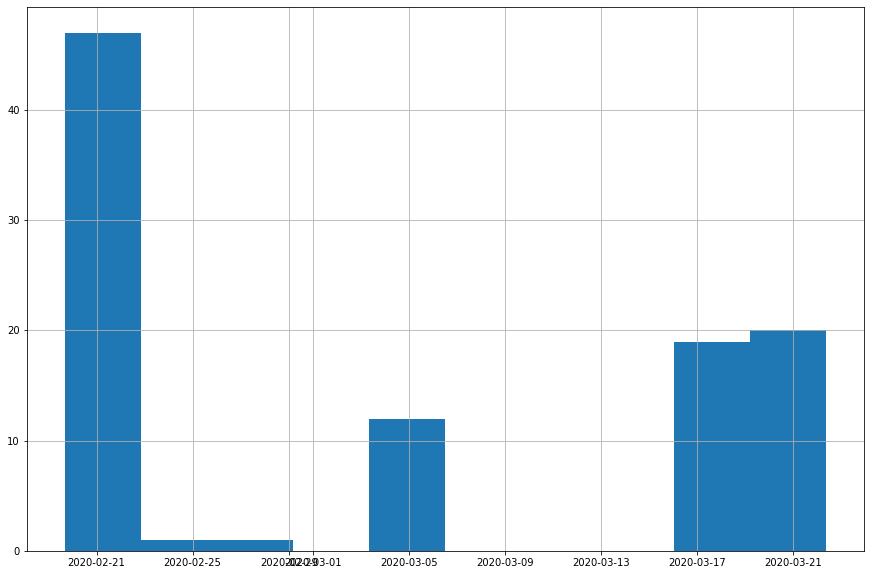

In [35]:
dates.hist(figsize=(15,10))

### Cleaning
- Remove
    - All urls
    - '#' form infront of hashtags
    - mentions
    - emojis
    - Non ASCII chanracters

In [36]:
from Processing import clean_text
sample_tweets['clean_text'] = sample_tweets['text'].apply(lambda x: clean_text(x))
sample_tweets

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device,clean_text
0,We've got a playlist on our site.\n\nIf you ha...,1.584608e+09,qklahoma202,1240558609013956610,1240560987616526337,"Tulsa, OK",Twitter Web App,we've got a playlist on our site. if you have ...
1,Google LCC: Google is censoring legitimate You...,1.582206e+09,YukKelvin,1230463000789712896,1230489115172327424,Hong Kong,Twitter for iPhone,google lcc google is censoring legitimate yout...
2,streaming nonstop on spotify and also just pur...,1.584566e+09,ephneyt,1240384362488553472,1240384362488553472,191007 변백현 ♡,Twitter for Android,streaming nonstop on spotify and also just pur...
3,Kicking off Google #Hashcode at @42SiliconVall...,1.582220e+09,42SiliconValley,1230546446622982145,1230546446622982145,"Fremont, CA",Twitter for iPhone,kicking off google hashcode at !
4,Ignoring tf outta these google classroom notif...,1.584682e+09,juliaamarie14,1240435705915961344,1240874253265838080,"Houston, TX",Twitter for iPhone,ignoring tf outta these google classroom notif...
...,...,...,...,...,...,...,...,...
95,👀\nA Google Cloud mgr has been arrested on sus...,1.582228e+09,LfodtP,1230575611975876608,1230577663716339713,United States,Twitter for Android,a google cloud mgr has been arrested on suspic...
96,What is going on with this google search fam 😭...,1.584528e+09,mfsemuju,1239972868848406531,1240225106070290432,NaN,Twitter for Android,what is going on with this google search fam
97,What is going on with this google search fam 😭...,1.584495e+09,EricC2019,1239972868848406531,1240087522207838209,"Channelview, TX",Twitter for iPhone,what is going on with this google search fam
98,It has come to my attention that Lee Pace owns...,1.582417e+09,G1N1NTU4N,1230930181352718342,1231372442246868999,NaN,Twitter for Android,it has come to my attention that lee pace owns...


In [37]:
import nltk
from nltk.text import Text
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt

tokenizer = TweetTokenizer()

all_clean_text = []
for text in sample_tweets['clean_text']:
    for t in tokenizer.tokenize(text):
        all_clean_text.append(t)
all_clean_text = Text(all_clean_text)

In [38]:
# Lets's see what set of words are used
freq_dist = nltk.FreqDist(all_clean_text)

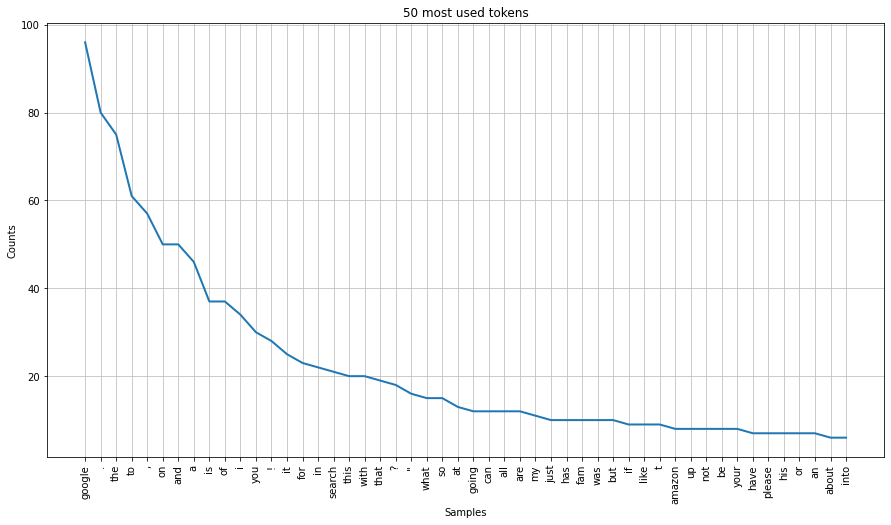

In [39]:
plt.figure(figsize=(15,8))
freq_dist.plot(50, title="50 most used tokens")

In [40]:
# Remove evrything except alphabets
freq_dist = nltk.FreqDist(dict((word, freq) for word, freq in freq_dist.items() if word.isalpha()))

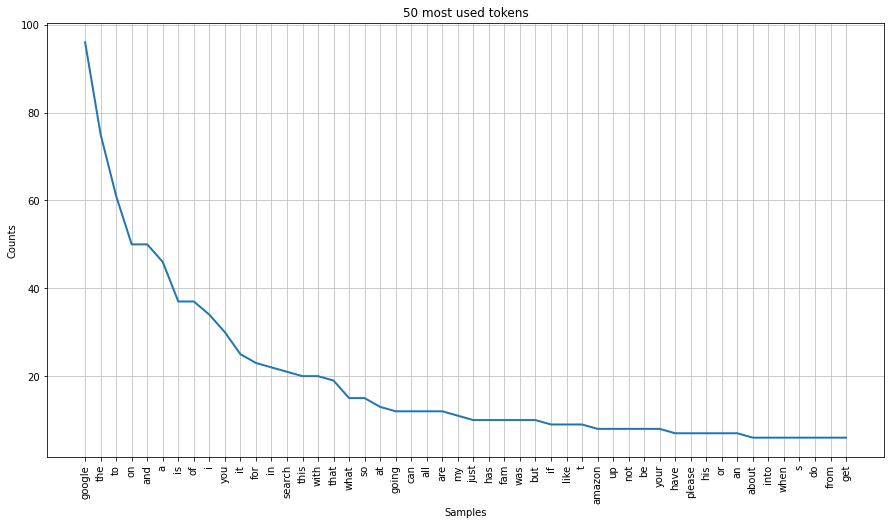

In [41]:
plt.figure(figsize=(15,8))
freq_dist.plot(50, title="50 most used tokens")

In [42]:
nltk.download('stopwords')

from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

# Add 'google' and 'search' in stop words
stop_words.add('google')
stop_words.add('search')
# Remove stopwords
freq_dist = nltk.FreqDist(dict((word, freq) for word, freq in freq_dist.items() if word not in stop_words))

[nltk_data] Downloading package stopwords to /home/mukul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


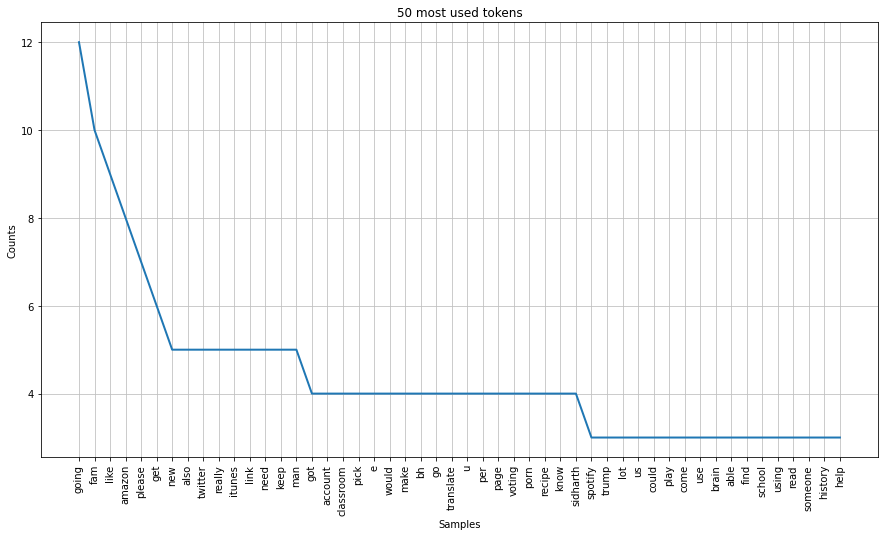

In [43]:
plt.figure(figsize=(15,8))
freq_dist.plot(50, title="50 most used tokens")

In [44]:
def is_retweet(x):
    return x[0] != x[1]

In [45]:
sample_tweets['is_retweet'] = sample_tweets[['tweet_source','tweet_id']].apply(lambda x: is_retweet(x), axis=1)

In [46]:
sample_tweets

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device,clean_text,is_retweet
0,We've got a playlist on our site.\n\nIf you ha...,1.584608e+09,qklahoma202,1240558609013956610,1240560987616526337,"Tulsa, OK",Twitter Web App,we've got a playlist on our site. if you have ...,True
1,Google LCC: Google is censoring legitimate You...,1.582206e+09,YukKelvin,1230463000789712896,1230489115172327424,Hong Kong,Twitter for iPhone,google lcc google is censoring legitimate yout...,True
2,streaming nonstop on spotify and also just pur...,1.584566e+09,ephneyt,1240384362488553472,1240384362488553472,191007 변백현 ♡,Twitter for Android,streaming nonstop on spotify and also just pur...,False
3,Kicking off Google #Hashcode at @42SiliconVall...,1.582220e+09,42SiliconValley,1230546446622982145,1230546446622982145,"Fremont, CA",Twitter for iPhone,kicking off google hashcode at !,False
4,Ignoring tf outta these google classroom notif...,1.584682e+09,juliaamarie14,1240435705915961344,1240874253265838080,"Houston, TX",Twitter for iPhone,ignoring tf outta these google classroom notif...,True
...,...,...,...,...,...,...,...,...,...
95,👀\nA Google Cloud mgr has been arrested on sus...,1.582228e+09,LfodtP,1230575611975876608,1230577663716339713,United States,Twitter for Android,a google cloud mgr has been arrested on suspic...,True
96,What is going on with this google search fam 😭...,1.584528e+09,mfsemuju,1239972868848406531,1240225106070290432,NaN,Twitter for Android,what is going on with this google search fam,True
97,What is going on with this google search fam 😭...,1.584495e+09,EricC2019,1239972868848406531,1240087522207838209,"Channelview, TX",Twitter for iPhone,what is going on with this google search fam,True
98,It has come to my attention that Lee Pace owns...,1.582417e+09,G1N1NTU4N,1230930181352718342,1231372442246868999,NaN,Twitter for Android,it has come to my attention that lee pace owns...,True
